In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

In [24]:
file_path_1 = '/Users/tagirgalimov/Desktop/Петрофизика-2сем/rhob_10.csv'
file_path_2 = '/Users/tagirgalimov/Desktop/Петрофизика-2сем/rhob_30.csv'
file_path_3 = '/Users/tagirgalimov/Desktop/Петрофизика-2сем/rhob_50.csv'

In [30]:
rhob10 = np.loadtxt(file_path_1)
rhob30 = np.loadtxt(file_path_2)
rhob50 = np.loadtxt(file_path_3)
rhob10

array([2.4770738 , 2.44414656, 2.45095589, 2.45902057, 2.36738189,
       2.59652333, 2.4355661 , 2.48444259, 2.48348978, 2.53963421,
       2.48154373, 2.14335849, 1.82966678, 2.09292928, 1.94828511,
       1.83738742, 1.96628479, 1.90219911, 2.00119922, 1.95767349,
       2.21177764, 2.01779528, 1.98925697, 2.03636751, 2.14144577,
       2.0916327 , 2.42838457, 2.73431611, 2.48226912, 2.52745686,
       2.46893073, 2.00014244, 1.88196045, 1.96198889, 1.99838879,
       1.84409972, 2.13900343, 2.04961801, 1.94686734, 2.02334872,
       2.02628619, 2.43617178, 2.1227801 , 2.320668  , 2.34623394,
       2.27821659, 2.25738333, 2.43575182, 2.17112872, 2.29343095,
       2.22748294, 2.25196888, 2.42603741, 2.33787234, 2.26816098,
       2.34789036, 1.88426341, 1.96514781, 2.06018358, 1.81442598,
       1.82505646, 1.94983795, 2.19667615, 2.01346225, 1.89253237,
       2.13839615, 2.26040926, 2.16341943, 2.33893062, 2.31607129,
       2.15933469, 2.30511191, 2.29771058, 2.24314216, 2.30956

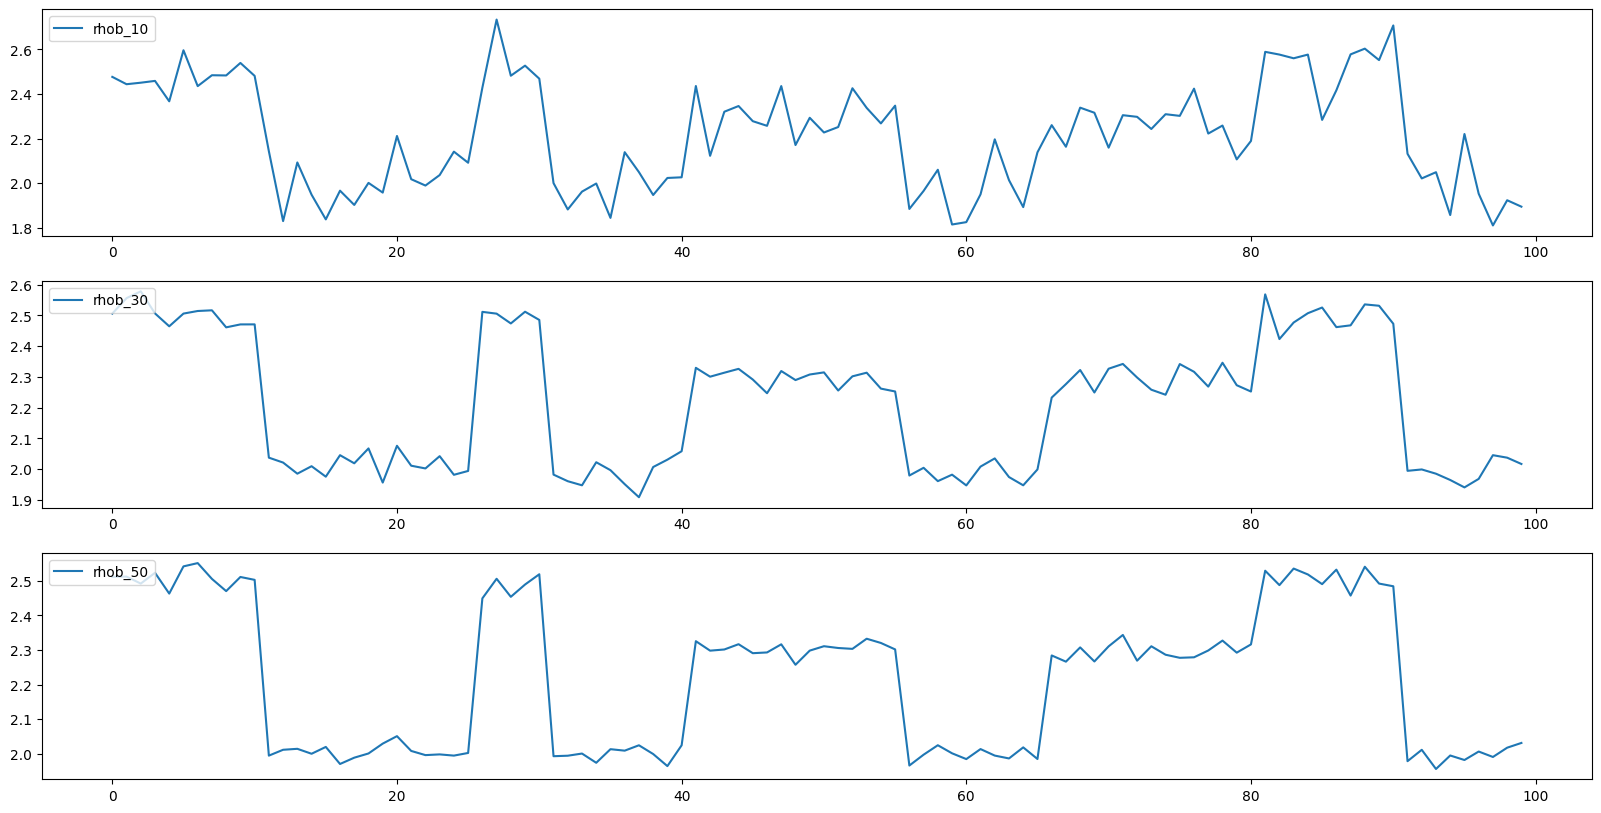

In [35]:
fig, axs = plt.subplots(3, 1, figsize = (20, 10))
x = np.arange(0,100, 1)
for ax, data, name in zip(axs, (rhob10, rhob30, rhob50), ('rhob_10', 'rhob_30', 'rhob_50')):
    ax.plot(x, data, label=name)
    ax.legend(loc="upper left")


In [37]:
def k_means (data, clusters):
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    data = data.reshape(-1, 1)
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    appr_data = kmeans.predict(data)
    return np.array([centers[label] for label in appr_data])



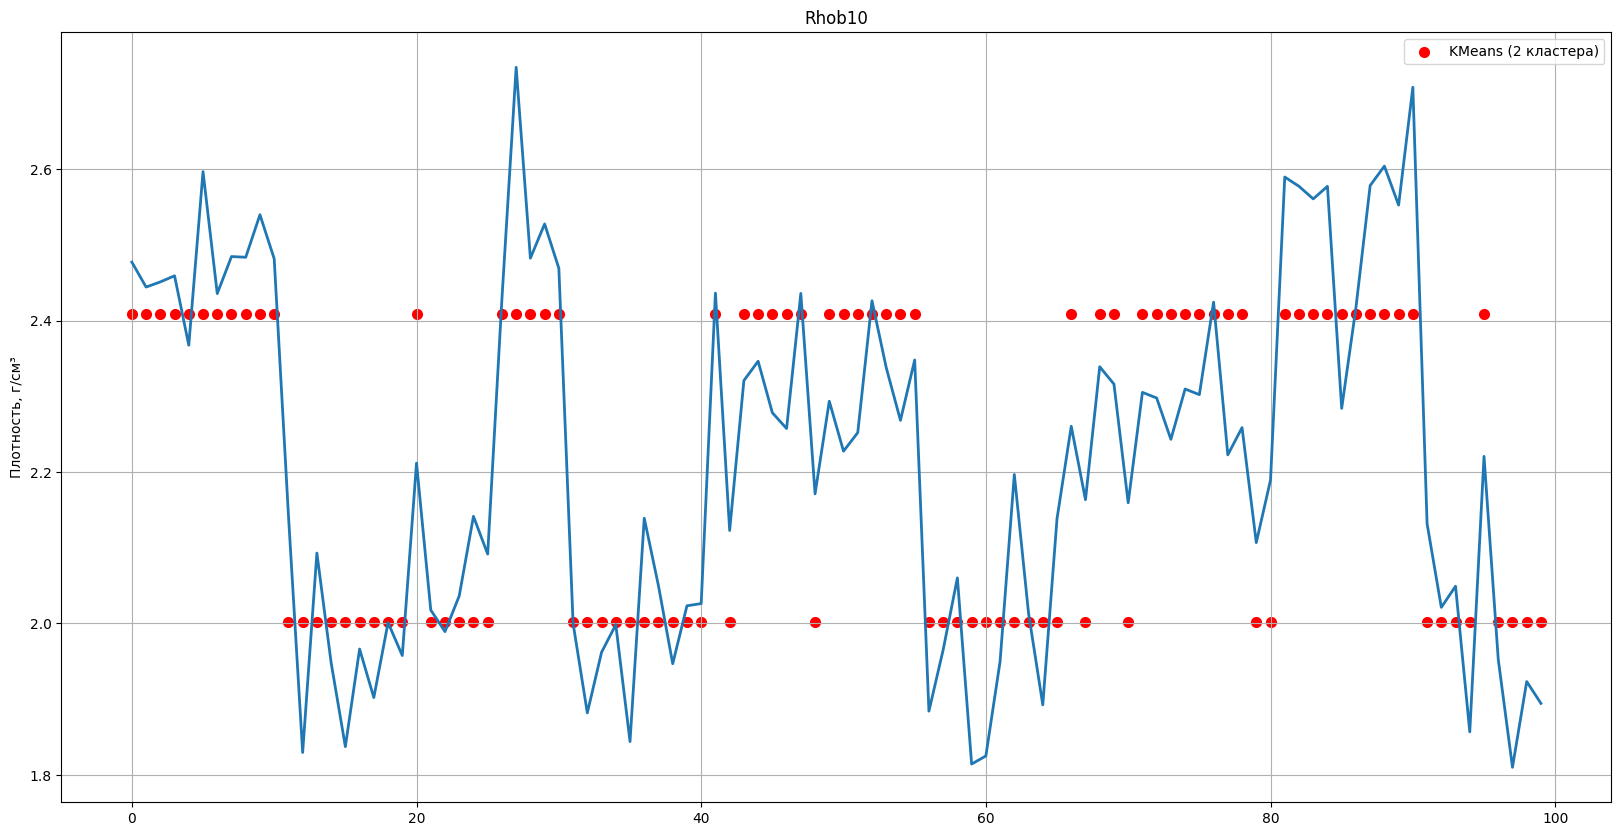

In [51]:
rhob10_kmeans = k_means(rhob10, 2)

plt.figure(figsize=(20, 10))

plt.plot(x, rhob10, linewidth=2)
plt.scatter(x, rhob10_kmeans, label="KMeans (2 кластера)", linewidth=2, color='red')

plt.ylabel("Плотность, г/см³")
plt.title("Rhob10")
plt.legend()
plt.grid()
plt.show()


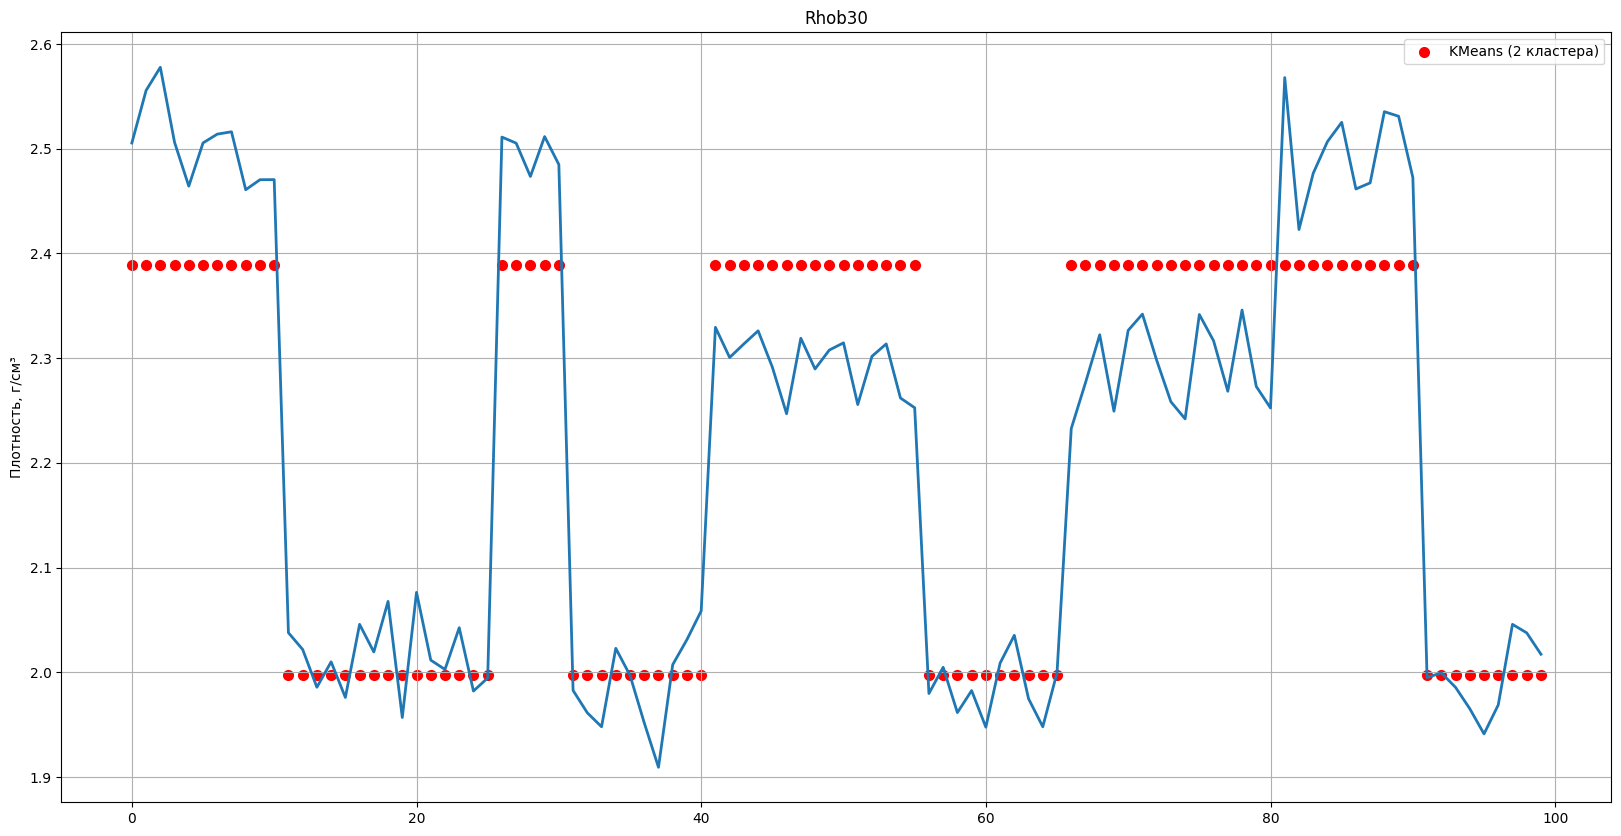

In [50]:
rhob30_kmeans = k_means(rhob30, 2)

plt.figure(figsize=(20, 10))

plt.plot(x, rhob30, linewidth=2)
plt.scatter(x, rhob30_kmeans, label="KMeans (2 кластера)", linewidth=2, color='red')

plt.ylabel("Плотность, г/см³")
plt.title("Rhob30")
plt.legend()
plt.grid()
plt.show()

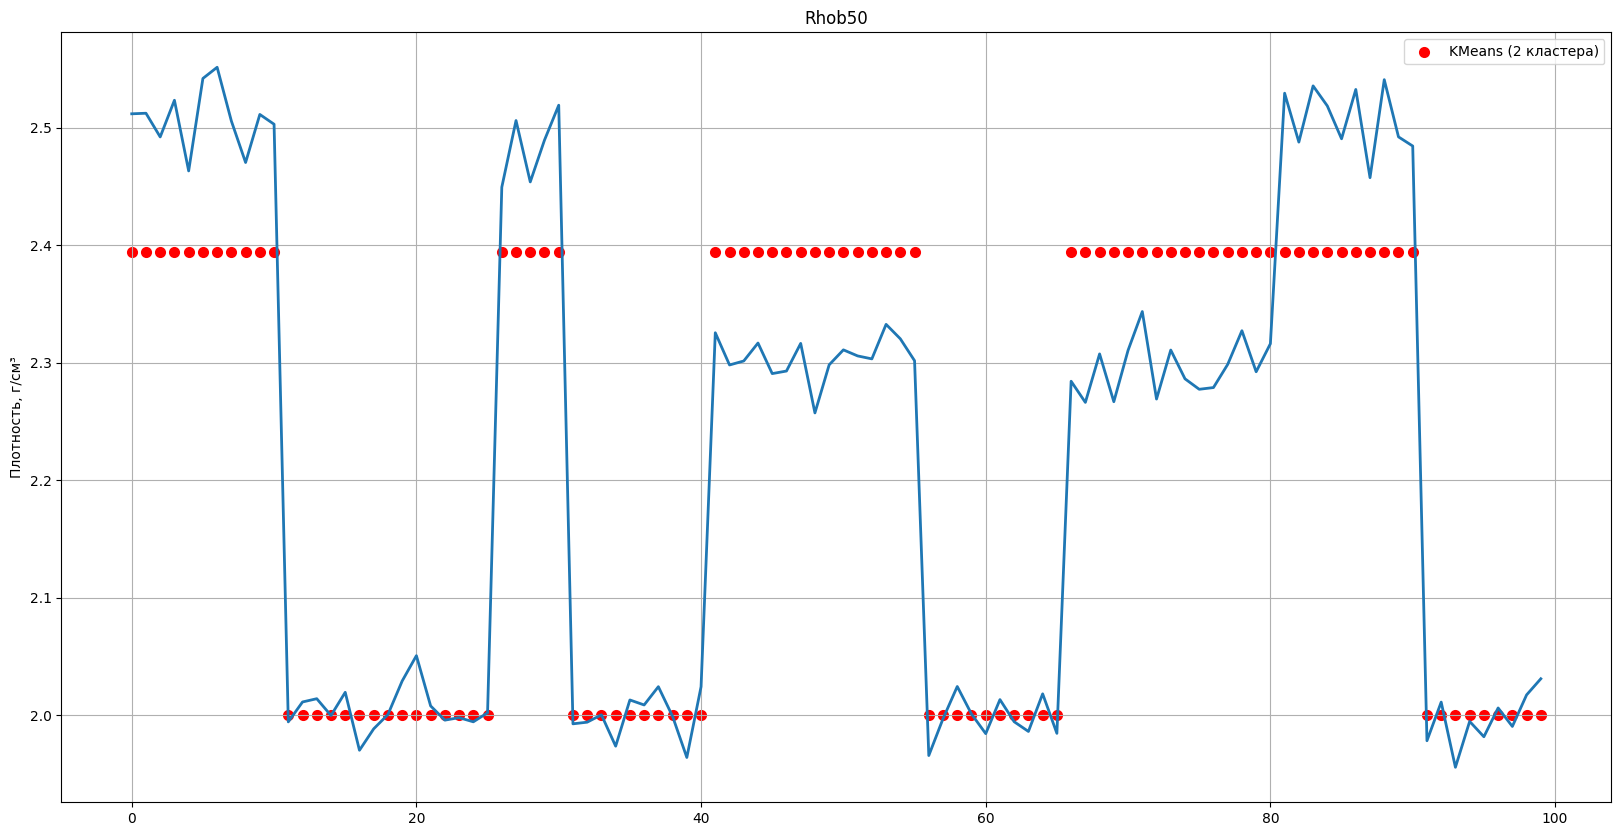

In [49]:
rhob50_kmeans = k_means(rhob50, 2)

plt.figure(figsize=(20, 10))

plt.plot(x, rhob50, linewidth=2)
plt.scatter(x, rhob50_kmeans, label="KMeans (2 кластера)", linewidth=2, color='red')

plt.ylabel("Плотность, г/см³")
plt.title("Rhob50")
plt.legend()
plt.grid()
plt.show()

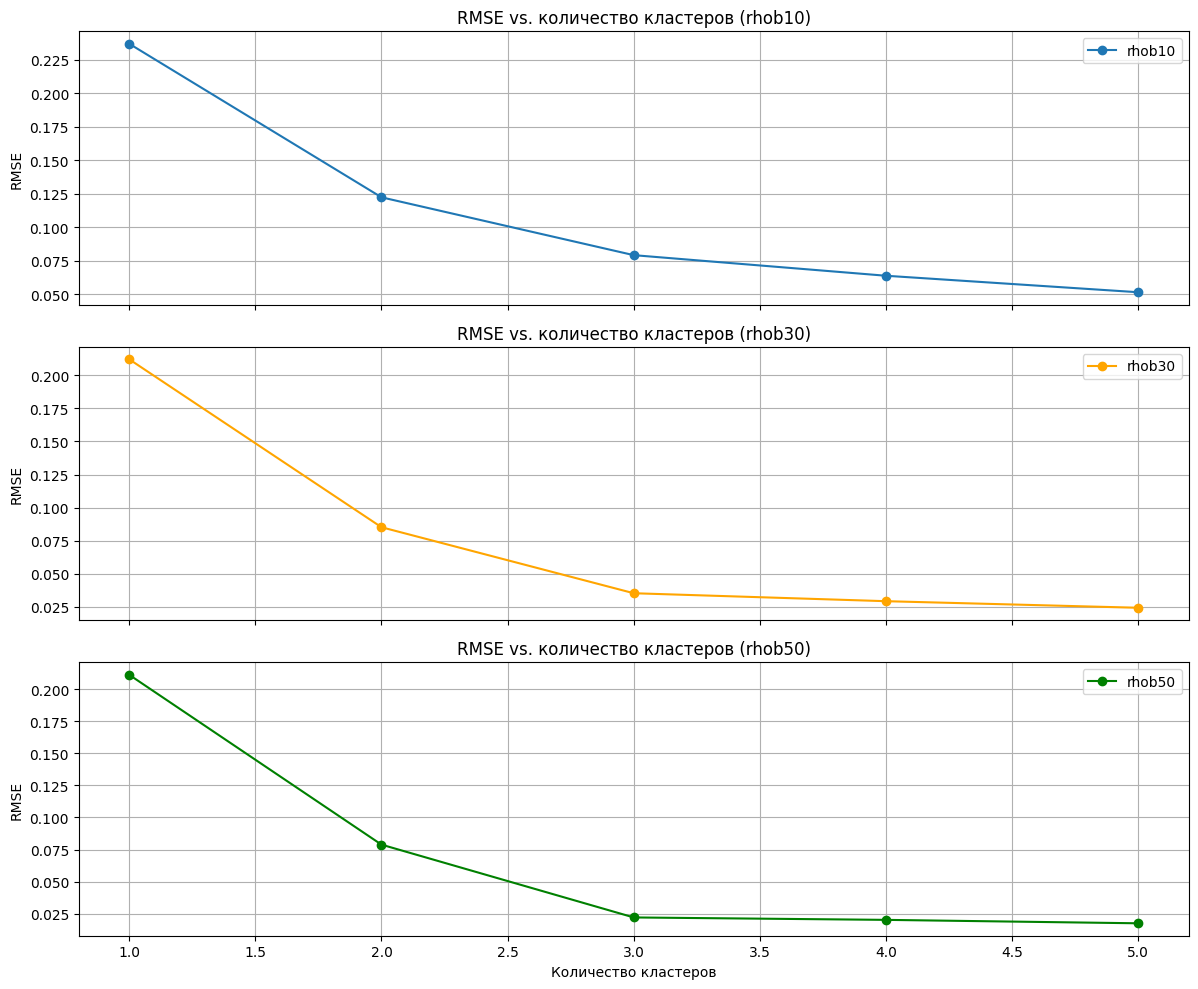

In [59]:
import matplotlib.pyplot as plt
import numpy as np

n_appr = np.arange(1, 6)

rmse_10 = []
rmse_30 = []
rmse_50 = []

for i in n_appr:
    rmse_10.append(RMSE(rhob10, k_means(rhob10, i)))
    rmse_30.append(RMSE(rhob30, k_means(rhob30, i)))
    rmse_50.append(RMSE(rhob50, k_means(rhob50, i)))

fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axs[0].plot(n_appr, rmse_10, marker='o', label='rhob10')
axs[0].set_ylabel("RMSE")
axs[0].set_title("RMSE vs. количество кластеров (rhob10)")
axs[0].grid()
axs[0].legend()

axs[1].plot(n_appr, rmse_30, marker='o', label='rhob30', color='orange')
axs[1].set_ylabel("RMSE")
axs[1].set_title("RMSE vs. количество кластеров (rhob30)")
axs[1].grid()
axs[1].legend()

axs[2].plot(n_appr, rmse_50, marker='o', label='rhob50', color='green')
axs[2].set_ylabel("RMSE")
axs[2].set_xlabel("Количество кластеров")
axs[2].set_title("RMSE vs. количество кластеров (rhob50)")
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()


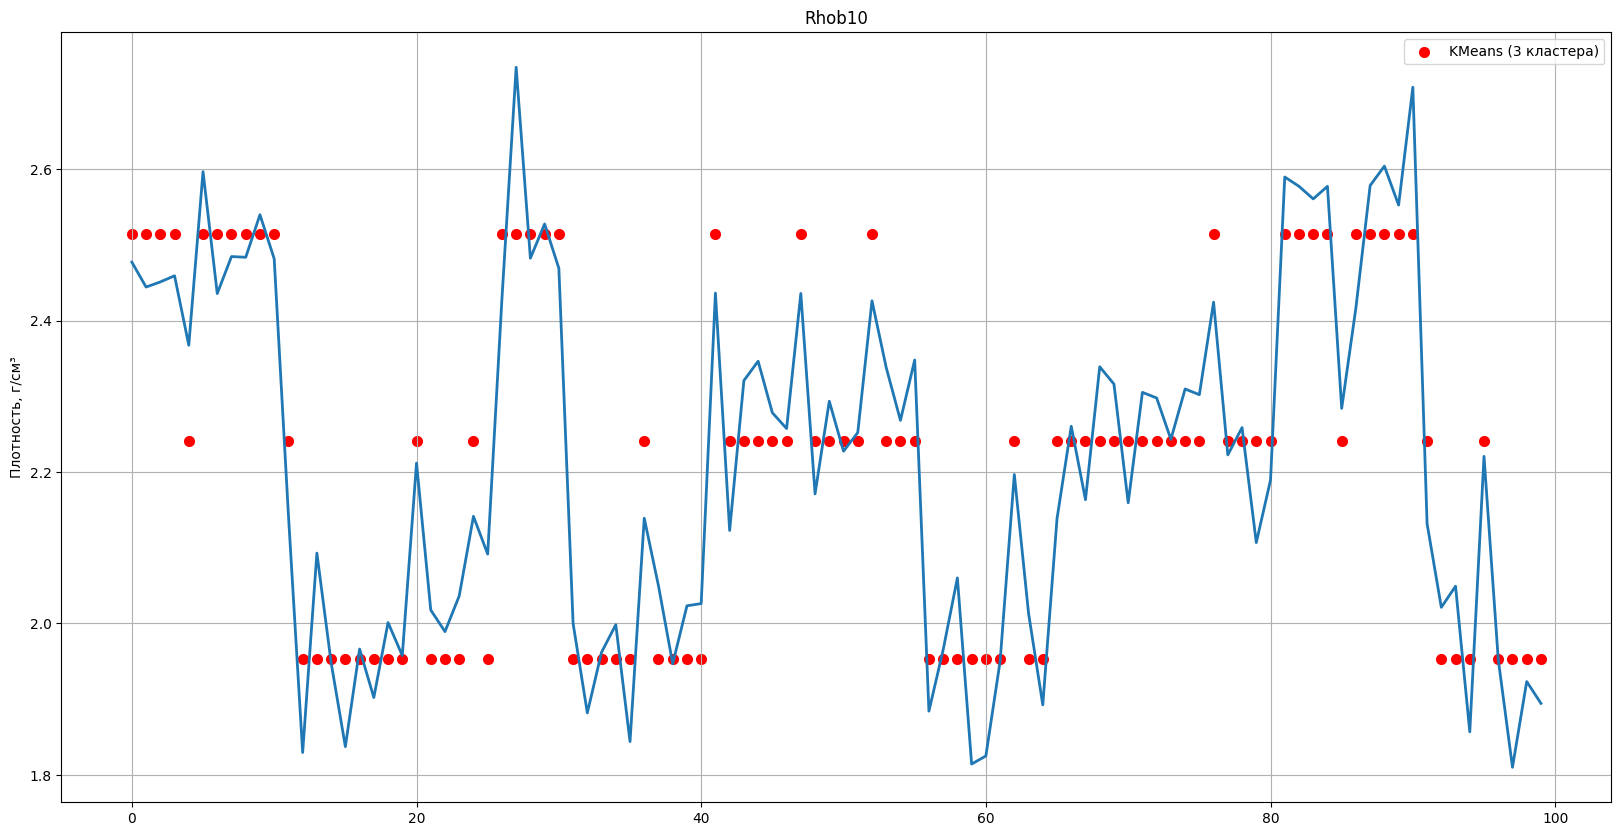

In [60]:
rhob10_kmeans = k_means(rhob10, 3)

plt.figure(figsize=(20, 10))

plt.plot(x, rhob10, linewidth=2)
plt.scatter(x, rhob10_kmeans, label="KMeans (3 кластера)", linewidth=2, color='red')

plt.ylabel("Плотность, г/см³")
plt.title("Rhob10")
plt.legend()
plt.grid()
plt.show()

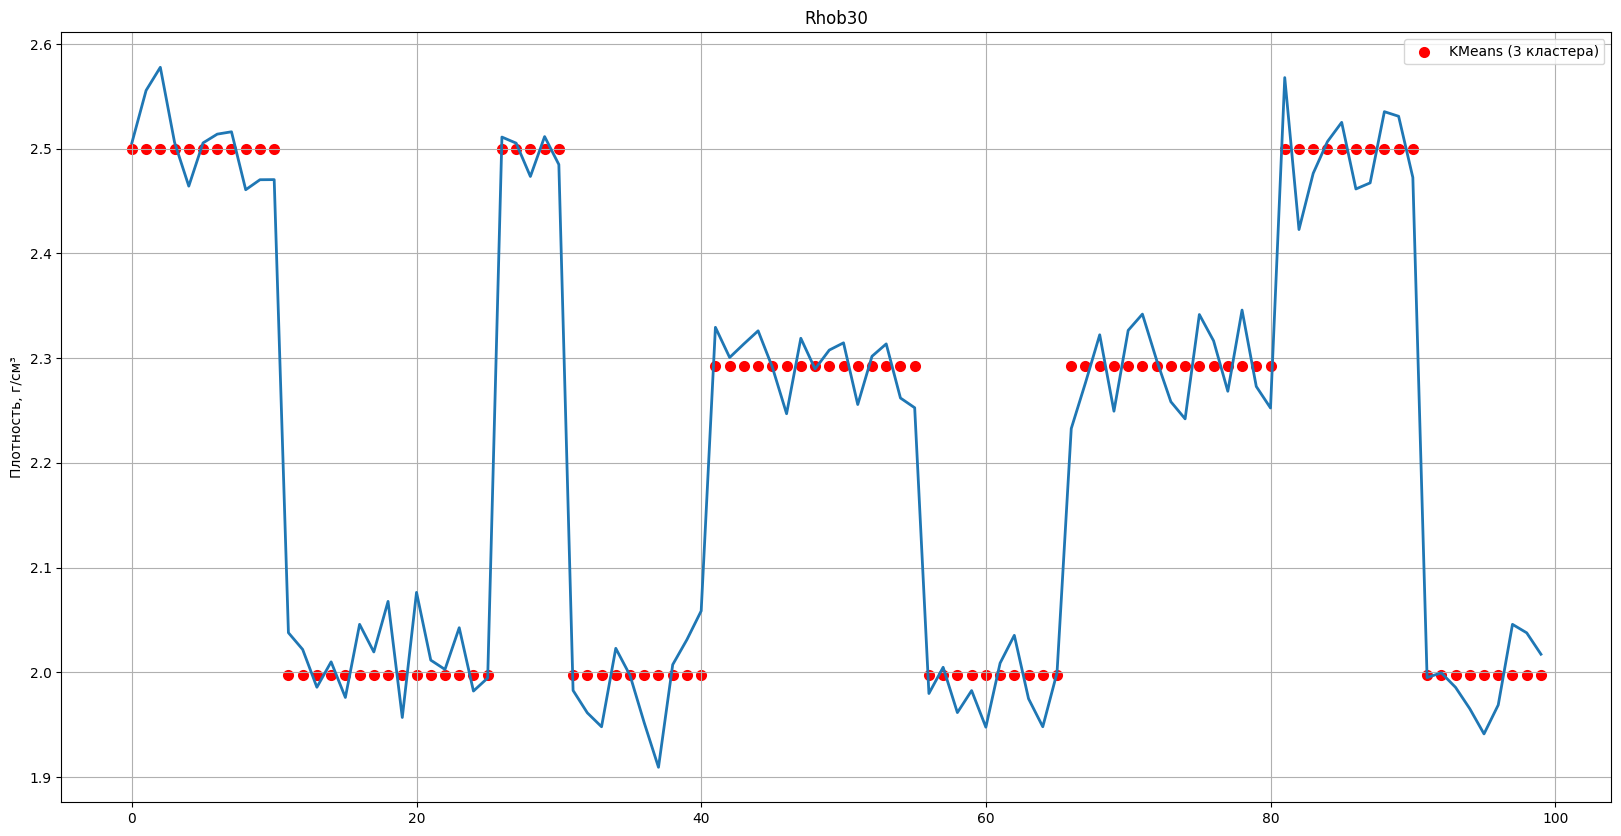

In [61]:
rhob30_kmeans = k_means(rhob30, 3)

plt.figure(figsize=(20, 10))

plt.plot(x, rhob30, linewidth=2)
plt.scatter(x, rhob30_kmeans, label="KMeans (3 кластера)", linewidth=2, color='red')

plt.ylabel("Плотность, г/см³")
plt.title("Rhob30")
plt.legend()
plt.grid()
plt.show()

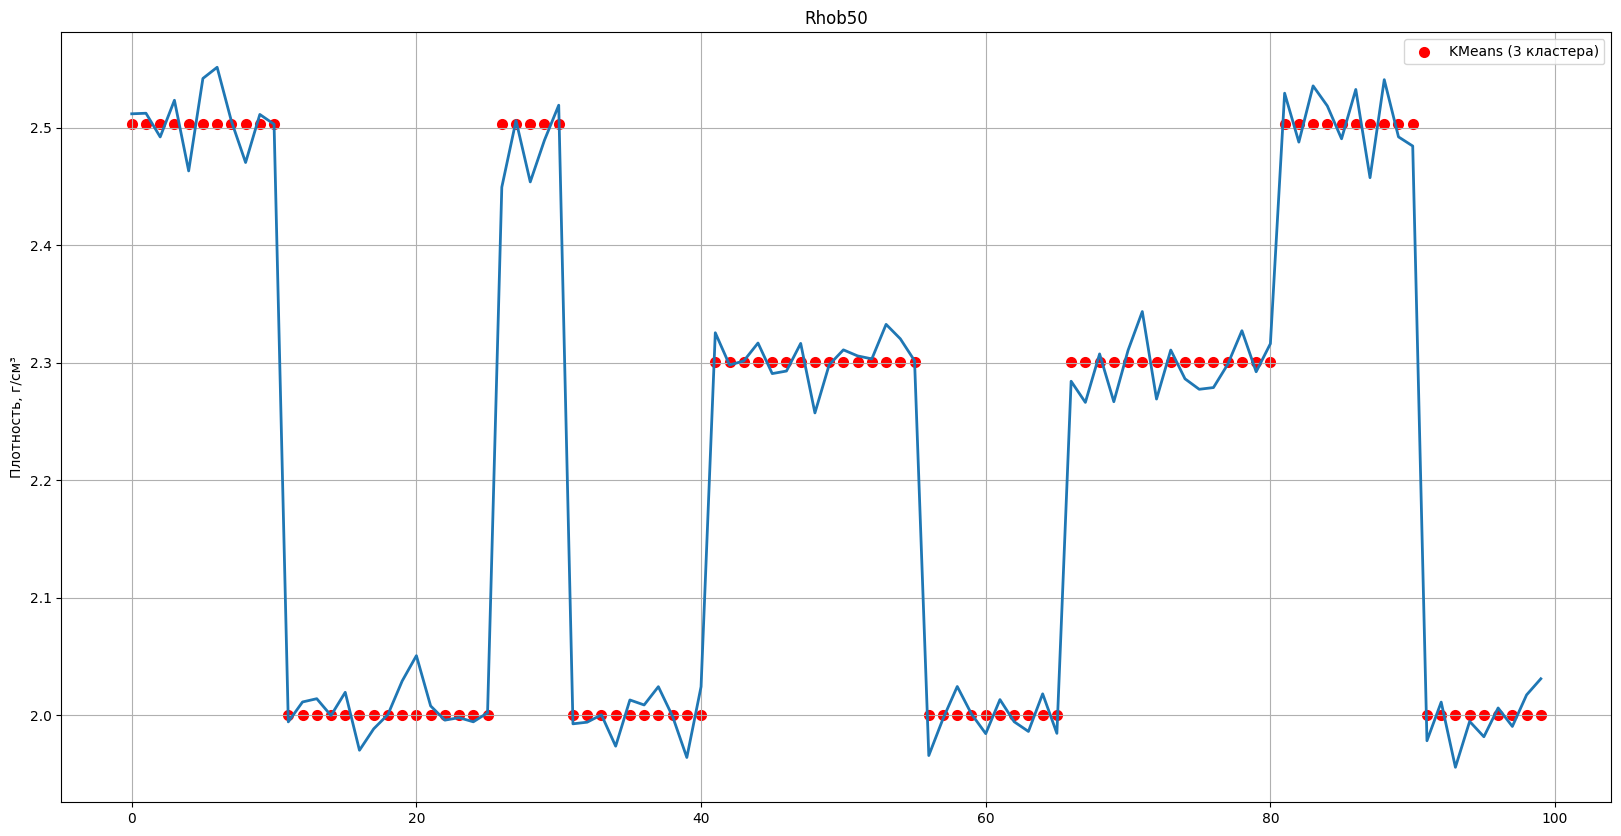

In [62]:
rhob50_kmeans = k_means(rhob50, 3)

plt.figure(figsize=(20, 10))

plt.plot(x, rhob50, linewidth=2)
plt.scatter(x, rhob50_kmeans, label="KMeans (3 кластера)", linewidth=2, color='red')

plt.ylabel("Плотность, г/см³")
plt.title("Rhob50")
plt.legend()
plt.grid()
plt.show()